# Churn Prediction Using ANN

In [226]:
import numpy as np
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
import cv2
%matplotlib inline

In [ ]:
#Reading the file

df=pd.read_csv("C:/project/churn/Telecom.csv")
df.sample(5)

In [ ]:
#Checking the type of variables

In [228]:
df.drop("customerID",axis="columns",inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [229]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [230]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [ ]:
# Converting object type variable to numeric

In [231]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
#Identifying the number of blank 

In [232]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [ ]:
#Locating the type of nul value

In [233]:
df.iloc[488]["TotalCharges"]

' '

In [ ]:
#Removing the blank data cells

In [234]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [268]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

In [267]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
#Data Visualization

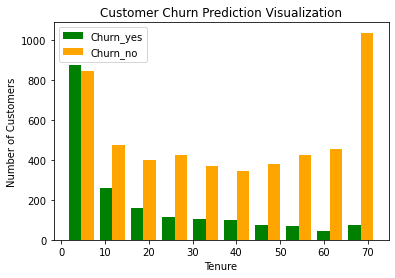

In [237]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure
plt.xlabel('Tenure')
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes,tenure_churn_no],color=["green","orange"],label=["Churn_yes","Churn_no"])
plt.legend()

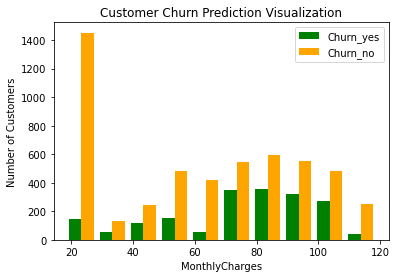

In [238]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
tenure_churn_no=df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges
plt.xlabel('MonthlyCharges')
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes,tenure_churn_no],color=["green","orange"],label=["Churn_yes","Churn_no"])
plt.legend()

In [239]:
for column in df:
    if df[column].dtypes=="object":
        print( f'{column}:{df[column].unique()}')
    

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


In [271]:
df1.replace("No internet service","No",inplace=True)
df1.replace("No phone service","No",inplace=True)

In [ ]:
#converting yes and no to 1 and 0

In [270]:
df1.replace("No","0",inplace=True)
df1.replace("Yes","1",inplace=True)
df1.replace("Female","1",inplace=True)
df1.replace("Male","0",inplace=True)

In [242]:
for column in df1:
    if df1[column].dtypes=="object":
        print( f'{column}:{df1[column].unique()}')

gender:['1' '0']
Partner:['1' '0']
Dependents:['0' '1']
PhoneService:['0' '1']
MultipleLines:['0' '1']
InternetService:['DSL' 'Fiber optic' '0']
OnlineSecurity:['0' '1']
OnlineBackup:['1' '0']
DeviceProtection:['0' '1']
TechSupport:['0' '1']
StreamingTV:['0' '1']
StreamingMovies:['0' '1']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['1' '0']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['0' '1']


In [ ]:
#one hot encoding for categorical columns

In [243]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

df2

In [ ]:
#FEATURE SCALING

In [244]:
cols_to_scale=["tenure","MonthlyCharges","TotalCharges"]
import sklearn
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [245]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1146,0,0,0,0,0.394366,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
2277,0,0,0,0,0.901408,1,1,0,1,1,...,0,0,1,1,0,0,0,0,1,0
6694,0,0,1,1,0.098592,1,1,1,1,0,...,0,1,0,0,0,1,0,1,0,0
525,0,0,0,0,0.718310,1,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
#TRAIN TEST SPLIT

In [246]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

In [247]:
X_train.shape

(5625, 26)

In [ ]:
#BUILDING MODEL USING ANN(TENSOR FLOW AND KERAS)

In [248]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5207 - accuracy: 0.7470
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.8005
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.8016
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8012
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8020
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8073
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8046
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8076
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8084
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4040 - accura

In [249]:
X_test= np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7854


[0.4785366356372833, 0.7853589057922363]

In [250]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.5877384 ],
       [0.58427024],
       [0.01002703],
       [0.8928137 ],
       [0.51267725]], dtype=float32)

In [251]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
#CLASSIFICATION_REPORT

In [252]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       999
         1.0       0.65      0.56      0.60       408

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
#CONFUSION MATRIX

Text(69.0, 0.5, 'Truth')

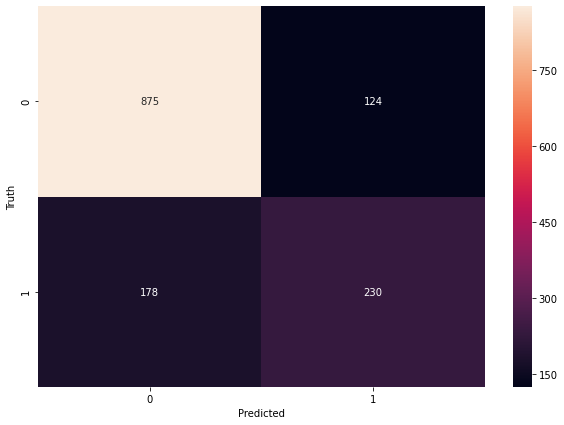

In [253]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [254]:
y_test.shape

(1407,)

In [ ]:
#ACCURACY

In [261]:
round((875+230)/(875+230+178+124),2)

0.79

In [ ]:
#Precision for 0 class. 

In [262]:
round(875/(875+178),2)

0.83

In [ ]:
#Precision for 1 class

In [263]:
round(230/(230+124),2)

0.65

In [ ]:
#Recall for 0 class

In [264]:
round(875/(875+124),2)

0.88

In [ ]:
Recall for 1 class

In [265]:
round(230/(230+178),2)

0.56